In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
data = []
with open("train_data.txt", 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split(" ::: ")
        if len(parts) == 4:
            movie_id, movie_name, genre, description = parts
            data.append([movie_id, movie_name, genre, description])
train_df =pd.DataFrame(data, columns=["ID", "Movie", "Genre", "Description"])
train_df .head(3)

,ID,Movie,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...


In [3]:

print("Shape of Dataset : ",train_df.shape)

Shape of Dataset :  (54214, 4)


In [72]:
train_df.drop_duplicates(inplace=True)
x  = train_df["Description"]
y = train_df["Genre"]
train_df["Genre"].unique().__len__(),train_df["Genre"].unique()

(27,
 array(['drama', 'thriller', 'adult', 'documentary', 'comedy', 'crime',
        'reality-tv', 'horror', 'sport', 'animation', 'action', 'fantasy',
        'short', 'sci-fi', 'music', 'adventure', 'talk-show', 'western',
        'family', 'mystery', 'history', 'news', 'biography', 'romance',
        'game-show', 'musical', 'war'], dtype=object))

In [57]:

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val =  train_test_split(x, y,test_size=0.25, random_state=42)

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
x_train_tfidf = vectorizer.fit_transform(x_train)
x_val_tfidf = vectorizer.transform(x_val)
print("Shape of TF-IDF Matrix:", x_train_tfidf.shape)

Shape of TF-IDF Matrix: (40660, 5000)


In [59]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)
nb_preds = nb.predict(x_val_tfidf)

In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=200)
lr.fit(x_train_tfidf, y_train)
lr_preds = lr.predict(x_val_tfidf)

In [61]:
print("Naive Bayes Model Performance % :")
print("Accuracy:", accuracy_score(y_val, nb_preds)*100)


Naive Bayes Model Performance % :
Accuracy: 51.88874133097241


In [62]:
print("Logistic Regression Model Performance % :")
print("Accuracy:", accuracy_score(y_val, lr_preds)*100)

Logistic Regression Model Performance % :
Accuracy: 57.46643057400029


In [63]:
data = []
with open("test_data.txt", 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split(" ::: ")
        if len(parts) >= 3:
            movie_id, movie_name, description = parts[:3]
            data.append([movie_id, movie_name, description])
test_df =pd.DataFrame(data, columns=["ID", "Movie", "Description"])
test_df.head(10)



,ID,Movie,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),Before he was known internationally as a marti...
5,6,Riddle Room (2016),Emily Burns is being held captive in a room wi...
6,7,L'amica (1969),The beautiful but neglected wife of a brillian...
7,8,Ina Mina Dika (1989),Vasu Inamdar (Ina) suffers from a disorder whe...
8,9,Equinox Special: Britain's Tornados (2005),An insight into the tornados that hit Kensal R...
9,10,Press (2011),Press is a story of young people overwhelmed b...


In [64]:
X_test_tfidf = vectorizer.transform(test_df["Description"])
y_real=test_df['Movie']
test_preds_lr= lr.predict(X_test_tfidf)
test_preds_nb= nb.predict(X_test_tfidf)


In [65]:

data = []
with open("test_data_solution.txt", 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split(" ::: ")
        if len(parts) == 4:
            movie_id, movie_name, genre, description = parts
            data.append([movie_id, movie_name, genre, description])
soln_df =pd.DataFrame(data, columns=["ID", "Movie", "Genre", "Description"])
soln_df.drop_duplicates(inplace=True)
soln_df .head(10)

,ID,Movie,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...
5,6,Riddle Room (2016),horror,Emily Burns is being held captive in a room wi...
6,7,L'amica (1969),drama,The beautiful but neglected wife of a brillian...
7,8,Ina Mina Dika (1989),comedy,Vasu Inamdar (Ina) suffers from a disorder whe...
8,9,Equinox Special: Britain's Tornados (2005),documentary,An insight into the tornados that hit Kensal R...
9,10,Press (2011),drama,Press is a story of young people overwhelmed b...


In [66]:
solution=soln_df['Genre']

In [67]:
print("Logistic Regression Model Performance % :")
print("Final Accuracy on Test Data::", accuracy_score(solution,test_preds_lr)*100) 


Logistic Regression Model Performance % :
Final Accuracy on Test Data:: 57.68265682656827


In [68]:
print("Naive Bayes Model Performance % :")
print("Final Accuracy on Test Data::", accuracy_score(solution, test_preds_nb)*100)

Naive Bayes Model Performance % :
Final Accuracy on Test Data:: 51.78782287822878


C:\Users\mayan\AppData\Local\Temp\ipykernel_17544\2146092810.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='Set2')


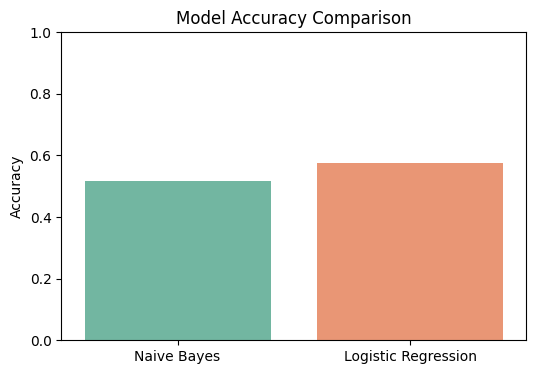

In [69]:
models = ['Naive Bayes', 'Logistic Regression']
accuracies = [accuracy_score(solution, test_preds_nb),accuracy_score(solution,test_preds_lr)]
plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracies, palette='Set2')
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

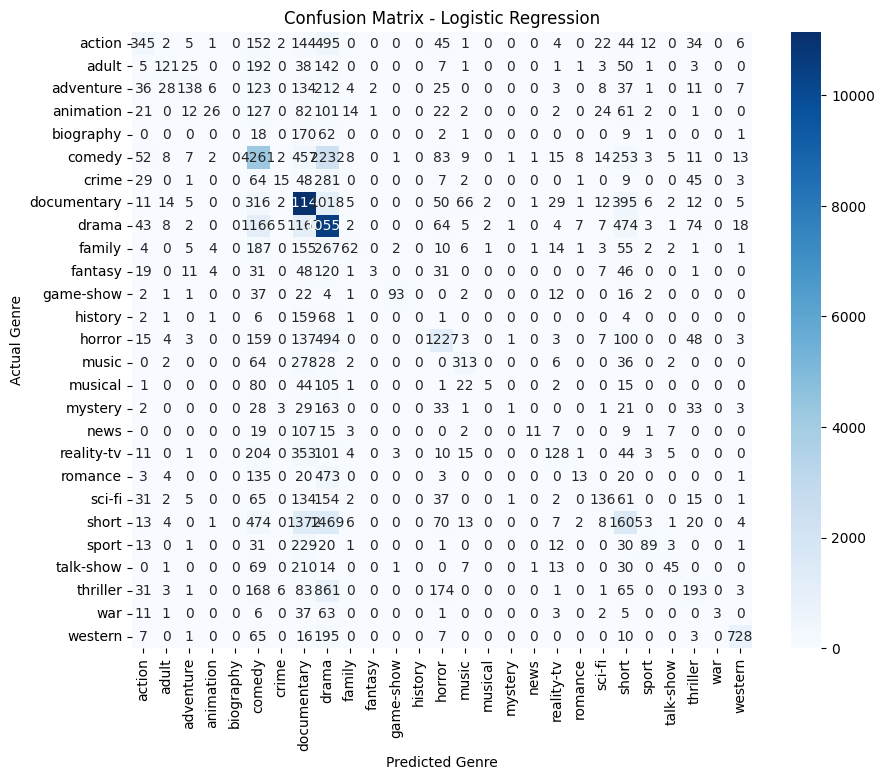

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(solution, test_preds_lr, labels=lr.classes_)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.xlabel("Predicted Genre")
plt.ylabel("Actual Genre")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

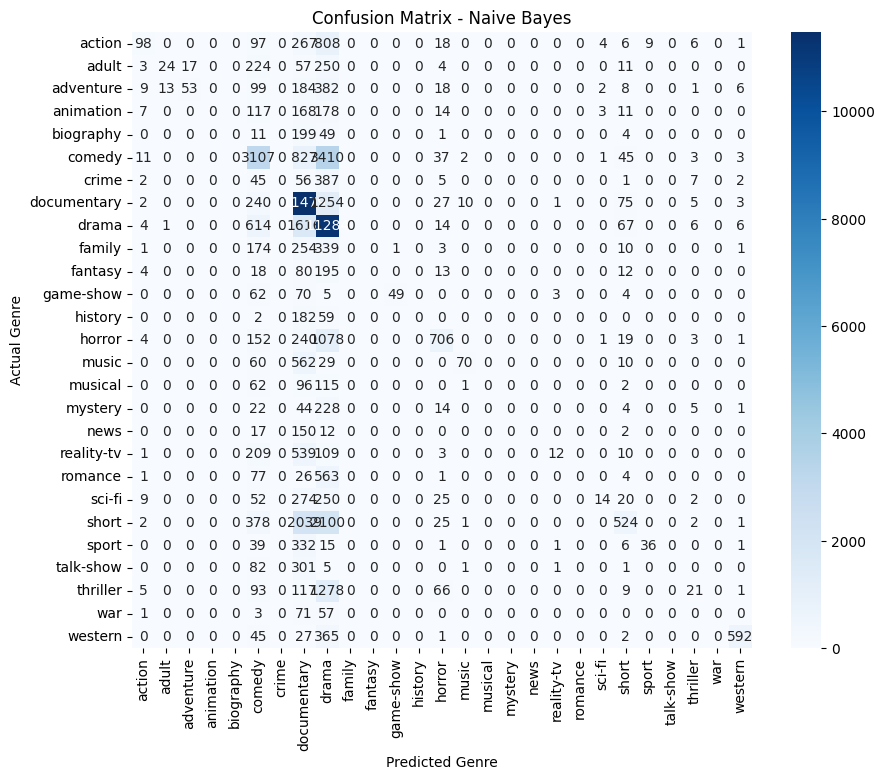

In [71]:
cm = confusion_matrix(solution, test_preds_nb, labels=nb.classes_)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel("Predicted Genre")
plt.ylabel("Actual Genre")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()
